[[이유한님] 캐글 코리아 캐글 스터디 커널 커리큘럼](https://kaggle-kr.tistory.com/32)

[3rd level. Home Credit Default Risk](https://www.kaggle.com/c/home-credit-default-risk)
'#'은 wonder1ng 각주  
표기가 없거나 '##~'은 원본 각주(혹은 코드)

# [Start Here: A Gentle Introduction](https://www.kaggle.com/code/willkoehrsen/start-here-a-gentle-introduction/notebook)

## Introduction: Home Credit Default Risk Competition
This notebook is intended for those who are new to machine learning competitions or want a gentle introduction to the problem. I purposely avoid jumping into complicated models or joining together lots of data in order to show the basics of how to get started in machine learning! Any comments or suggestions are much appreciated.  
  
In this notebook, we will take an initial look at the Home Credit default risk machine learning competition currently hosted on Kaggle. The objective of this competition is to use historical loan application data to predict whether or not an applicant will be able to repay a loan. This is a standard supervised classification task:  
  
- __Supervised__: The labels are included in the training data and the goal is to train a model to learn to predict the labels from the features  
- __Classification__: The label is a binary variable, 0 (will repay loan on time), 1 (will have difficulty repaying loan)  
  
## DeepL 번역
이 노트북은 머신 러닝 대회를 처음 접하거나 문제를 가볍게 소개하고자 하는 분들을 위한 것입니다. 머신 러닝을 시작하는 방법의 기본을 보여드리기 위해 복잡한 모델에 뛰어들거나 많은 데이터를 조인하는 것은 의도적으로 피했습니다! 어떤 의견이나 제안도 환영합니다.  
  
이 노트북에서는 현재 Kaggle에서 주최하는 주택 신용 불이행 위험 머신 러닝 경진대회에 대해 간략히 살펴보겠습니다. 이 대회의 목적은 과거 대출 신청 데이터를 사용하여 신청자가 대출을 상환할 수 있는지 여부를 예측하는 것입니다. 이것은 표준 지도 분류 과제입니다:  
  
- __감독__: 레이블이 학습 데이터에 포함되어 있으며, 목표는 특징으로부터 레이블을 예측하는 방법을 학습하는 모델을 훈련하는 것입니다.  
- __분류__: 레이블은 0(대출금을 제때 상환할 것), 1(대출금을 상환하기 어려울 것)의 이진 변수입니다.

### Data
The data is provided by Home Credit, a service dedicated to provided lines of credit (loans) to the unbanked population. Predicting whether or not a client will repay a loan or have difficulty is a critical business need, and Home Credit is hosting this competition on Kaggle to see what sort of models the machine learning community can develop to help them in this task.  
  
There are 7 different sources of data:  
  
- application_train/application_test: the main training and testing data with information about each loan application at Home Credit. Every loan has its own row and is identified by the feature SK_ID_CURR. The training application data comes with the TARGET indicating 0: the loan was repaid or 1: the loan was not repaid.
- bureau: data concerning client's previous credits from other financial institutions. Each previous credit has its own row in bureau, but one loan in the application data can have multiple previous credits.
- bureau_balance: monthly data about the previous credits in bureau. Each row is one month of a previous credit, and a single previous credit can have multiple rows, one for each month of the credit length.
- previous_application: previous applications for loans at Home Credit of clients who have loans in the application data. Each current loan in the application data can have multiple previous loans. Each previous application has one row and is identified by the feature SK_ID_PREV.
- POS_CASH_BALANCE: monthly data about previous point of sale or cash loans clients have had with Home Credit. Each row is one month of a previous point of sale or cash loan, and a single previous loan can have many rows.
- credit_card_balance: monthly data about previous credit cards clients have had with Home Credit. Each row is one month of a credit card balance, and a single credit card can have many rows.
- installments_payment: payment history for previous loans at Home Credit. There is one row for every made payment and one row for every missed payment.
  
Moreover, we are provided with the definitions of all the columns (in HomeCredit_columns_description.csv) and an example of the expected submission file.  
  
In this notebook, we will stick to using only the main application training and testing data. Although if we want to have any hope of seriously competing, we need to use all the data, for now we will stick to one file which should be more manageable. This will let us establish a baseline that we can then improve upon. With these projects, it's best to build up an understanding of the problem a little at a time rather than diving all the way in and getting completely lost!
  
### DeepL 번역
이 데이터는 은행 이용이 어려운 사람들에게 신용 한도(대출)를 제공하는 서비스인 Home Credit에서 제공합니다. 고객이 대출금을 상환할지 또는 어려움을 겪을지 예측하는 것은 중요한 비즈니스 요구 사항이며, Home Credit은 머신 러닝 커뮤니티가 이 작업을 지원하기 위해 어떤 종류의 모델을 개발할 수 있는지 알아보기 위해 Kaggle에서 이 대회를 개최하고 있습니다.  
  
7가지 데이터 소스가 있습니다:  
  
- application_train/application_test: Home Credit의 각 대출 신청에 대한 정보가 포함된 기본 훈련 및 테스트 데이터입니다. 모든 대출에는 고유한 행이 있으며 SK_ID_CURR 기능으로 식별됩니다. 훈련 신청 데이터에는 0: 대출이 상환되었거나 1: 대출이 상환되지 않았음을 나타내는 TARGET이 함께 제공됩니다.
- 금융기관: 다른 금융기관에서 받은 고객의 이전 크레딧에 관한 데이터입니다. 각 이전 크레딧은 뷰로에서 고유한 행을 가지지만, 신청 데이터의 한 대출에는 여러 개의 이전 크레딧이 있을 수 있습니다.
- BUREAU_BALANCE: 뷰로의 이전 크레딧에 대한 월별 데이터입니다. 각 행은 이전 크레딧의 한 달이며, 하나의 이전 크레딧에는 크레딧 기간의 월별로 하나씩 여러 행이 있을 수 있습니다.
- 이전_신청: 신청 데이터에 대출이 있는 고객의 홈크레딧에 대한 이전 대출 신청입니다. 신청 데이터의 각 현재 대출에는 여러 개의 이전 대출이 있을 수 있습니다. 각 이전 신청에는 하나의 행이 있으며 SK_ID_PREV 기능으로 식별됩니다.
- POS_CASH_BALANCE: 고객이 홈 크레딧을 통해 받은 이전 POS 또는 현금 대출에 대한 월별 데이터입니다. 각 행은 이전 POS 또는 현금 대출의 한 달치이며, 하나의 이전 대출에 여러 행이 있을 수 있습니다.
- 신용 카드 잔액: 고객이 홈 크레딧에서 사용한 이전 신용 카드에 대한 월별 데이터입니다. 각 행은 한 달간의 신용카드 잔액이며, 단일 신용카드에 여러 행이 있을 수 있습니다.
- installments_payment: 홈 크레딧의 이전 대출에 대한 결제 내역입니다. 결제한 모든 행과 미납한 모든 행에 대해 하나의 행이 있습니다.
  
또한 모든 열의 정의(홈크레딧_컬럼_설명.csv에 있음)와 예상 제출 파일의 예가 제공됩니다.  
  
이 노트북에서는 기본 애플리케이션 교육 및 테스트 데이터만 사용하겠습니다. 진지하게 경쟁에 임하려면 모든 데이터를 사용해야 하지만, 지금은 관리하기 쉬운 하나의 파일만 사용하겠습니다. 이를 통해 개선할 수 있는 기준선을 설정할 수 있습니다. 이러한 프로젝트에서는 한꺼번에 뛰어들어 완전히 길을 잃기보다는 한 번에 조금씩 문제에 대한 이해를 쌓는 것이 가장 좋습니다!

In [26]:
import numpy as np, pandas as pd, os, warnings, matplotlib.pyplot as plt, seaborn as sns
from sklearn.preprocessing import LabelEncoder

warnings.filterwarnings('ignore')

In [27]:
print(os.listdir('./input/003_home-credit-default-risk/'))

['application_test.csv', 'application_train.csv', 'bureau.csv', 'bureau_balance.csv', 'credit_card_balance.csv', 'home-credit-default-risk.zip', 'HomeCredit_columns_description.csv', 'installments_payments.csv', 'POS_CASH_balance.csv', 'previous_application.csv', 'sample_submission.csv']


In [28]:
app_train = pd.read_csv('./input/003_home-credit-default-risk/application_train.csv')
print('Training data shape:', app_train.shape)
app_train.head()

Training data shape: (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
app_test = pd.read_csv('./input/003_home-credit-default-risk/application_test.csv')
print('Testing data shape:', app_test.shape)
app_test.head()

Testing data shape: (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


### Exploratory Data Analysis
Exploratory Data Analysis (EDA) is an open-ended process where we calculate statistics and make figures to find trends, anomalies, patterns, or relationships within the data. The goal of EDA is to learn what our data can tell us. It generally starts out with a high level overview, then narrows in to specific areas as we find intriguing areas of the data. The findings may be interesting in their own right, or they can be used to inform our modeling choices, such as by helping us decide which features to use.  
  
### DeepL 번역
탐색적 데이터 분석(EDA)은 데이터 내에서 추세, 이상 징후, 패턴 또는 관계를 찾기 위해 통계를 계산하고 수치를 만들어내는 개방형 프로세스입니다. EDA의 목표는 데이터를 통해 무엇을 알 수 있는지 알아내는 것입니다. 일반적으로 높은 수준의 개요로 시작한 다음 데이터에서 흥미로운 영역을 발견하면 특정 영역으로 범위를 좁혀갑니다. 이러한 결과는 그 자체로 흥미로울 수도 있고, 어떤 기능을 사용할지 결정하는 데 도움을 주는 등 모델링 선택에 정보를 제공하는 데 사용될 수도 있습니다. 

TARGET
0    282686
1     24825
Name: count, dtype: int64


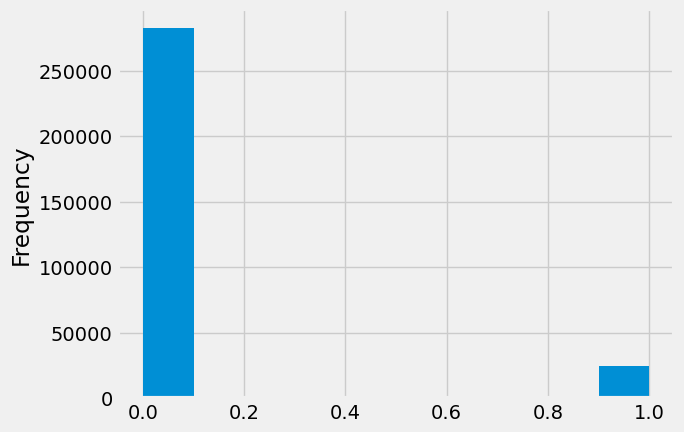

In [30]:
## Examine the Distribution of the Target Column
## The target is what we are asked to predict: either a 0 for the loan was repaid on time, or a 1 indicating the client had payment difficulties. We can first examine the number of loans falling into each category.
## From this information, we see this is an imbalanced class problem. There are far more loans that were repaid on time than loans that were not repaid. Once we get into more sophisticated machine learning models, we can weight the classes by their representation in the data to reflect this imbalance.

print(app_train['TARGET'].value_counts())
app_train['TARGET'].astype(int).plot.hist();

In [31]:
## Examine Missing Values
## Functuin ti claculate missing values by column# Funct

def missing_values_table(df):
    ## Total missing values
    mis_val = df.isnull().sum()

    ## Percentage of missing values
    mis_val_percent = 100*mis_val/len(df)

    ## Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    ## Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(columns={0: 'Missing Values', 1: '% of Total Values'})

    ## Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:, 1]!=0].sort_values('% of Total Values', ascending=False).round(1)

    ## Print some summary information
    print(f'Your selected dataframe has {str(df.shape[1])} columns.\nThere are {str(mis_val_table_ren_columns.shape[0])} columns that have missing values.')

    ## Return the dataframe with missing information
    return mis_val_table_ren_columns

In [32]:
## Missing values statistics
missing_values = missing_values_table(app_train)
missing_values.head(20)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


When it comes time to build our machine learning models, we will have to fill in these missing values (known as imputation). In later work, we will use models such as XGBoost that can [handle missing values with no need for imputation](https://stats.stackexchange.com/questions/235489/xgboost-can-handle-missing-data-in-the-forecasting-phase). Another option would be to drop columns with a high percentage of missing values, although it is impossible to know ahead of time if these columns will be helpful to our model. Therefore, we will keep all of the columns for now.  
  
__DeepL 번역__  
머신 러닝 모델을 구축할 때 이러한 누락된 값을 채워야 합니다(대입이라고 함). 이후 작업에서는 [대입할 필요 없이 결측값을 처리할 수 있는](https://stats.stackexchange.com/questions/235489/xgboost-can-handle-missing-data-in-the-forecasting-phase) XGBoost와 같은 모델을 사용할 것입니다. 또 다른 옵션은 결측값 비율이 높은 열을 삭제하는 것이지만, 이러한 열이 모델에 도움이 될지 미리 알 수는 없습니다. 따라서 지금은 모든 열을 유지하겠습니다.

In [33]:
## Column Types
## Number of each type of column
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
Name: count, dtype: int64

In [34]:
## Number of unique classes in each object column
app_train.select_dtypes('object').apply(pd.Series.nunique, axis=0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

### Encoding Categorical Variables
Before we go any further, we need to deal with pesky categorical variables. A machine learning model unfortunately cannot deal with categorical variables (except for some models such as LightGBM). Therefore, we have to find a way to encode (represent) these variables as numbers before handing them off to the model. There are two main ways to carry out this process:  
  
- Label encoding: assign each unique category in a categorical variable with an integer. No new columns are created.  
- One-hot encoding: create a new column for each unique category in a categorical variable. Each observation recieves a 1 in the column for its corresponding category and a 0 in all other new columns.  
  
The problem with label encoding is that it gives the categories an arbitrary ordering. The value assigned to each of the categories is random and does not reflect any inherent aspect of the category. In the example above, programmer recieves a 4 and data scientist a 1, but if we did the same process again, the labels could be reversed or completely different. The actual assignment of the integers is arbitrary. Therefore, when we perform label encoding, the model might use the relative value of the feature (for example programmer = 4 and data scientist = 1) to assign weights which is not what we want. If we only have two unique values for a categorical variable (such as Male/Female), then label encoding is fine, but for more than 2 unique categories, one-hot encoding is the safe option.  
  
There is some debate about the relative merits of these approaches, and some models can deal with label encoded categorical variables with no issues. Here is a good Stack Overflow discussion. I think (and this is just a personal opinion) for categorical variables with many classes, one-hot encoding is the safest approach because it does not impose arbitrary values to categories. The only downside to one-hot encoding is that the number of features (dimensions of the data) can explode with categorical variables with many categories. To deal with this, we can perform one-hot encoding followed by PCA or other dimensionality reduction methods to reduce the number of dimensions (while still trying to preserve information).  
  
In this notebook, we will use Label Encoding for any categorical variables with only 2 categories and One-Hot Encoding for any categorical variables with more than 2 categories. This process may need to change as we get further into the project, but for now, we will see where this gets us. (We will also not use any dimensionality reduction in this notebook but will explore in future iterations).  

### DeepL 번역
더 나아가기 전에 성가신 범주형 변수를 처리해야 합니다. 안타깝게도 머신 러닝 모델은 범주형 변수를 처리할 수 없습니다(LightGBM과 같은 일부 모델 제외). 따라서 이러한 변수를 모델에 넘기기 전에 숫자로 인코딩(표현)하는 방법을 찾아야 합니다. 이 프로세스를 수행하는 방법에는 크게 두 가지가 있습니다:  
  
- 레이블 인코딩: 범주형 변수의 각 고유 카테고리를 정수로 할당합니다. 새 열이 생성되지 않습니다. 아래에 예가 나와 있습니다. 범주형 변수는 다루지 않습니다(LightGBM과 같은 일부 모델 제외). 따라서 이러한 변수를 모델에 넘기기 전에 숫자로 인코딩(표현)하는 방법을 찾아야 합니다. 이 프로세스를 수행하는 방법에는 크게 두 가지가 있습니다:

- 레이블 인코딩: 범주형 변수의 각 고유 카테고리를 정수로 할당합니다. 새 열이 생성되지 않습니다.  
- 원핫 인코딩: 범주형 변수의 각 고유 범주에 대해 새 열을 만듭니다. 각 관측값은 해당 범주에 해당하는 열에 1을, 다른 모든 새 열에 0을 받습니다.  
  
라벨 인코딩의 문제점은 카테고리에 임의의 순서를 부여한다는 것입니다. 각 카테고리에 할당된 값은 무작위이며 카테고리의 고유한 측면을 반영하지 않습니다. 위의 예에서 프로그래머는 4를, 데이터 과학자는 1을 받았지만, 동일한 프로세스를 다시 수행하면 레이블이 뒤바뀌거나 완전히 달라질 수 있습니다. 정수의 실제 할당은 임의적입니다. 따라서 레이블 인코딩을 수행할 때 모델은 기능의 상대적 값(예: 프로그래머 = 4, 데이터 과학자 = 1)을 사용하여 우리가 원하는 것과는 다른 가중치를 할당할 수 있습니다. 범주형 변수에 대해 고유한 값이 두 개만 있는 경우(예: 남성/여성) 레이블 인코딩을 사용해도 괜찮지만 고유한 범주가 두 개 이상인 경우에는 원핫 인코딩이 안전한 옵션입니다.  
  
이러한 접근 방식의 상대적인 장점에 대한 논쟁이 있으며, 일부 모델은 레이블 인코딩된 범주형 변수를 문제 없이 처리할 수 있습니다. 스택 오버플로에 대한 좋은 토론이 여기 있습니다. 많은 클래스가 있는 범주형 변수의 경우 원핫 인코딩이 범주에 임의의 값을 부과하지 않기 때문에 가장 안전한 접근 방식이라고 생각합니다(이것은 개인적인 의견일 뿐입니다). 원핫 인코딩의 유일한 단점은 카테고리가 많은 범주형 변수의 경우 피처(데이터의 차원) 수가 폭발적으로 증가할 수 있다는 것입니다. 이 문제를 해결하기 위해 원핫 인코딩을 수행한 다음 PCA 또는 다른 차원 축소 방법을 사용하여 차원 수를 줄이면서(정보를 보존하려고 노력하면서) 차원 수를 줄일 수 있습니다.  
  
이 노트북에서는 카테고리가 2개뿐인 범주형 변수에는 라벨 인코딩을 사용하고, 카테고리가 2개 이상인 범주형 변수에는 원핫 인코딩을 사용하겠습니다. 이 프로세스는 프로젝트가 진행됨에 따라 변경해야 할 수도 있지만, 지금은 어떤 결과를 얻을 수 있는지 살펴보겠습니다. (이 노트북에서는 차원 축소도 사용하지 않지만 향후 반복 작업에서 살펴볼 예정입니다).  

In [35]:
## Create a label encoder object
le = LabelEncoder()
le_count = 0

## Iterate through the columns
for col in app_train:
    if app_train[col].dtypes=='object':
        ## If 2 or fewer unique categories
        if len(list(app_train[col].unique()))<=2:
            ## Train on the training data
            le.fit(app_train[col])
            ## Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])

            ## Keep track of how many columns were label encoded
            le_count += 1

print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [36]:
## one-hot encoding of categorical variables
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Training Features shape:', app_train.shape)
print('Testing Features shape:', app_test.shape)

Training Features shape: (307511, 243)
Testing Features shape: (48744, 239)


### Aligning Training and Testing Data
There need to be the same features (columns) in both the training and testing data. One-hot encoding has created more columns in the training data because there were some categorical variables with categories not represented in the testing data. To remove the columns in the training data that are not in the testing data, we need to align the dataframes. First we extract the target column from the training data (because this is not in the testing data but we need to keep this information). When we do the align, we must make sure to set axis = 1 to align the dataframes based on the columns and not on the rows!  
  
### Deepl  번역
학습 데이터와 테스트 데이터 모두에 동일한 특징(열)이 있어야 합니다. 원핫 인코딩으로 인해 학습 데이터에 더 많은 열이 생성되었는데, 이는 테스트 데이터에 표현되지 않은 범주가 있는 범주형 변수가 일부 있었기 때문입니다. 학습 데이터에서 테스트 데이터에 없는 열을 제거하려면 데이터 프레임을 정렬해야 합니다. 먼저 학습 데이터에서 대상 열을 추출합니다(테스트 데이터에는 없지만 이 정보를 유지해야 하므로). 정렬을 할 때 행이 아닌 열을 기준으로 데이터 프레임을 정렬하려면 축을 1로 설정해야 합니다!

In [37]:
train_labels = app_train['TARGET']

## Align the training and testing data, kepp only columns present in both dataframes
app_train, app_test = app_train.align(app_test, join='inner', axis=1)   # data_1.align(data_2): data 2개를 각 조인하여 (data_1, data_2)의 조인된 튜플로 반환

## Add the target back in
app_train['TARGET'] = train_labels

print('Training Features shape:', app_train.shape)
print('Testing Features shape:', app_test.shape)

Training Features shape: (307511, 240)
Testing Features shape: (48744, 239)


### Back to Exploratory Data Analysis
  
__Anomalies__  
One problem we always want to be on the lookout for when doing EDA is anomalies within the data. These may be due to mis-typed numbers, errors in measuring equipment, or they could be valid but extreme measurements. One way to support anomalies quantitatively is by looking at the statistics of a column using the describe method. The numbers in the DAYS_BIRTH column are negative because they are recorded relative to the current loan application. To see these stats in years, we can mutliple by -1 and divide by the number of days in a year:  
  
### DeepL 번역
__이상 징후__  
EDA를 수행할 때 항상 주의해야 할 문제 중 하나는 데이터 내의 이상 현상입니다. 이는 숫자를 잘못 입력하거나 측정 장비의 오류로 인한 것일 수도 있고, 유효하지만 극단적인 측정값일 수도 있습니다. 이상값을 정량적으로 지원하는 한 가지 방법은 설명 방법을 사용하여 열의 통계를 살펴보는 것입니다. DAYS_BIRTH 열의 숫자는 현재 대출 신청을 기준으로 기록되기 때문에 음수입니다. 이러한 통계를 연도 단위로 보려면 -1을 곱하고 1년의 일수로 나누면 됩니다:

In [38]:
(app_train['DAYS_BIRTH']/-365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [39]:
app_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

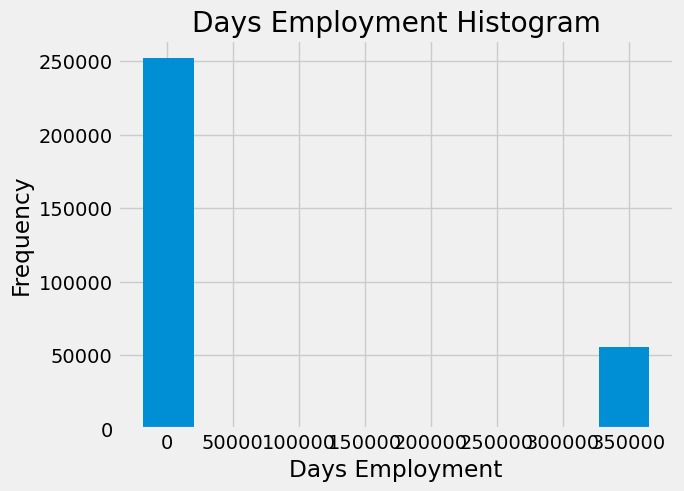

In [40]:
app_train['DAYS_EMPLOYED'].plot.hist(title='Days Employment Histogram')
plt.xlabel('Days Employment');

In [41]:
anom = app_train[app_train['DAYS_EMPLOYED']==365243]
non_anom = app_train[app_train['DAYS_EMPLOYED']!=365243]
print('The non-anomalies default on %0.2f%% of loans' %(100*non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' %(100*anom['TARGET'].mean()))
print('There are %d anomalous days of employment' %(len(anom)))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


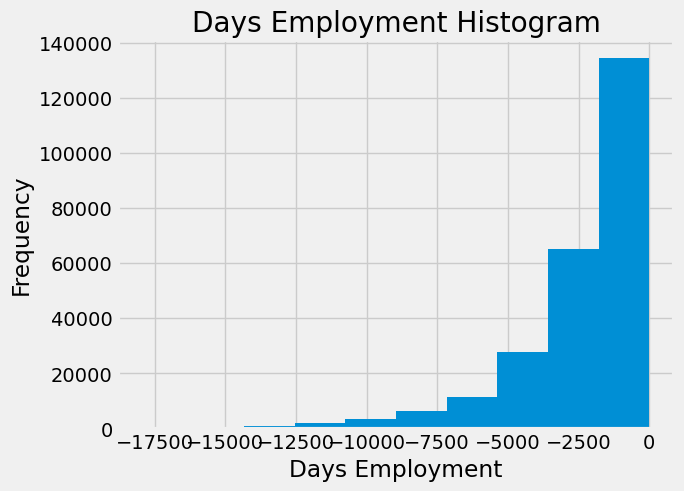

In [42]:
## Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train['DAYS_EMPLOYED']==365243
## Replace the anomalous values with nan
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace=True)
app_train['DAYS_EMPLOYED'].plot.hist(title='Days Employment Histogram')
plt.xlabel('Days Employment');

In [43]:
app_test['DAYS_EMPLOYED_ANOM'] = app_test['DAYS_EMPLOYED']==365243
app_test['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace=True)

print('There are %d anomalies in the test data out of %d entries' %(app_test['DAYS_EMPLOYED_ANOM'].sum(), len(app_test)))

There are 9274 anomalies in the test data out of 48744 entries


### Correlations
Now that we have dealt with the categorical variables and the outliers, let's continue with the EDA. One way to try and understand the data is by looking for correlations between the features and the target. We can calculate the Pearson correlation coefficient between every variable and the target using the .corr dataframe method.  
  
The correlation coefficient is not the greatest method to represent "relevance" of a feature, but it does give us an idea of possible relationships within the data. Some general interpretations of the absolute value of the correlation coefficent are:  

- .00-.19 “very weak”
- .20-.39 “weak”
- .40-.59 “moderate”
- .60-.79 “strong”
- .80-1.0 “very strong”
  
### DeepL 번역
범주형 변수와 이상값을 다루었으므로 이제 EDA를 계속해 보겠습니다. 데이터를 이해하는 한 가지 방법은 특징과 대상 간의 상관관계를 찾는 것입니다. .corr 데이터프레임 방법을 사용하여 모든 변수와 대상 간의 피어슨 상관 계수를 계산할 수 있습니다.  
  
상관 계수는 피처의 '관련성'을 나타내는 가장 좋은 방법은 아니지만, 데이터 내에서 가능한 관계에 대한 아이디어를 제공합니다. 상관 계수의 절대값에 대한 몇 가지 일반적인 해석은 다음과 같습니다:  

- .00-.19 "매우 약함"
- .20-.39 "약함"
- .40-.59 "보통"
- .60-.79 "강함"
- .80-1.0 "매우 강함"

In [44]:
## Find correlations with the target and sort
correlations = app_train.corr()['TARGET'].sort_values()

## Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

Most Negati

In [45]:
## Effect of Age on Repayment
## Find the correlation of the positive days since birth and target
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])


-0.07823930830984513

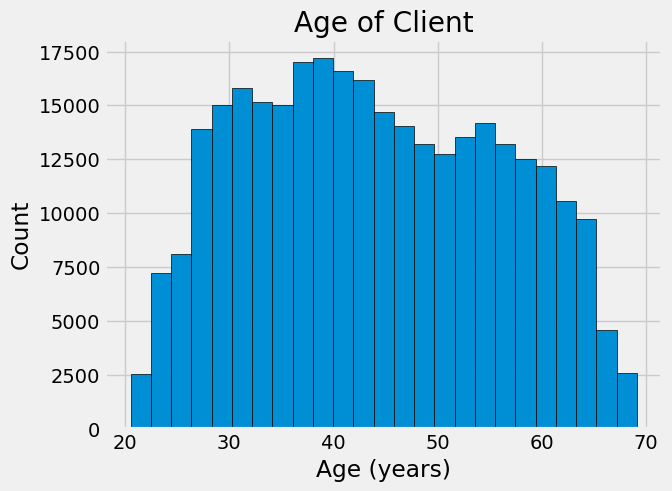

In [46]:
## Set the style of plots
plt.style.use('fivethirtyeight')

## plot the distribution of in years
plt.hist(app_train['DAYS_BIRTH']/365, edgecolor='k', bins=25)
plt.title('Age of Client')
plt.xlabel('Age (years)')
plt.ylabel('Count');

By itself, the distribution of age does not tell us much other than that there are no outliers as all the ages are reasonable. To visualize the effect of the age on the target, we will next make a [kernel density estimation plot](https://en.wikipedia.org/wiki/Kernel_density_estimation) (KDE) colored by the value of the target. A [kernel density estimate plot shows the distribution of a single variable](https://chemicalstatistician.wordpress.com/2013/06/09/exploratory-data-analysis-kernel-density-estimation-in-r-on-ozone-pollution-data-in-new-york-and-ozonopolis/) and can be thought of as a smoothed histogram (it is created by computing a kernel, usually a Gaussian, at each data point and then averaging all the individual kernels to develop a single smooth curve). We will use the seaborn kdeplot for this graph.  
  
__DeepL 번역__  
  
연령 분포는 그 자체로는 모든 연령이 합리적이기 때문에 이상값이 없다는 것 외에는 많은 것을 알려주지 않습니다. 연령이 대상에 미치는 영향을 시각화하기 위해 다음으로 대상의 값에 따라 색을 입힌 [커널 밀도 추정 플롯](https://en.wikipedia.org/wiki/Kernel_density_estimation)(KDE)을 만들겠습니다. [커널 밀도 추정 플롯은 단일 변수의 분포를 보여주며](https://chemicalstatistician.wordpress.com/2013/06/09/exploratory-data-analysis-kernel-density-estimation-in-r-on-ozone-pollution-data-in-new-york-and-ozonopolis/) 평활화된 히스토그램으로 생각할 수 있습니다(각 데이터 포인트에서 커널(일반적으로 가우스)을 계산한 다음 모든 개별 커널의 평균을 구하여 하나의 부드러운 곡선을 생성하여 만듭니다). 이 그래프에는 seaborn kdeplot을 사용하겠습니다.

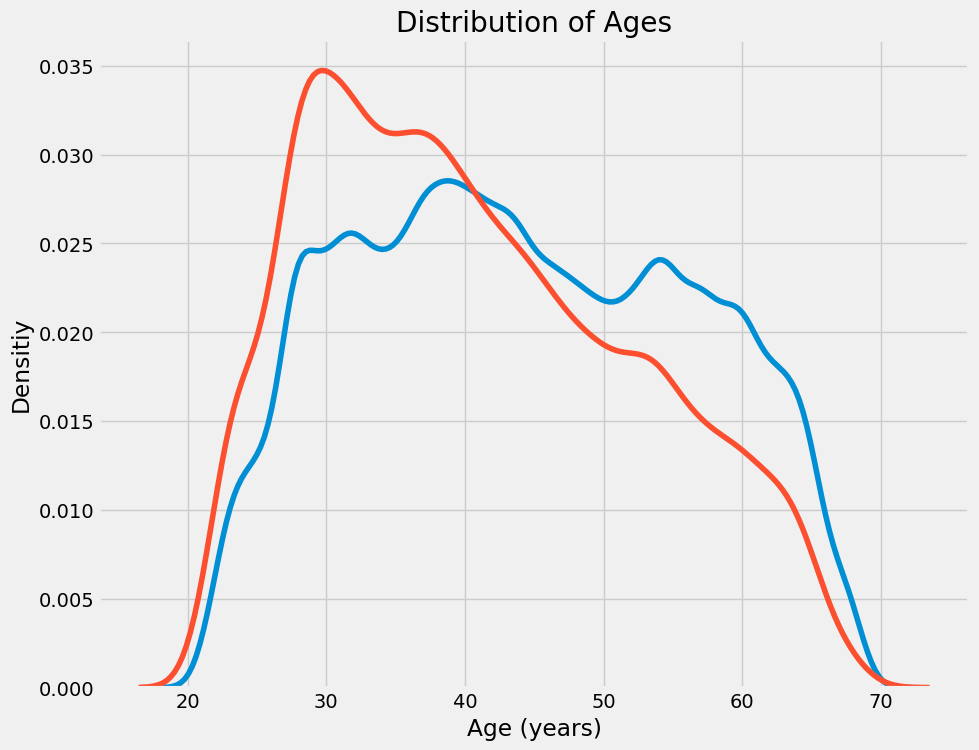

In [47]:
plt.figure(figsize=(10,8))

## KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET']==0, 'DAYS_BIRTH']/365, label='target==0')

## KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET']==1, 'DAYS_BIRTH']/365, label='target==1')

## Labeling of plot
plt.xlabel('Age (years)')
plt.ylabel('Densitiy')
plt.title('Distribution of Ages');

The target == 1 curve skews towards the younger end of the range. Although this is not a significant correlation (-0.07 correlation coefficient), this variable is likely going to be useful in a machine learning model because it does affect the target. Let's look at this relationship in another way: average failure to repay loans by age bracket.  
  
To make this graph, first we cut the age category into bins of 5 years each. Then, for each bin, we calculate the average value of the target, which tells us the ratio of loans that were not repaid in each age category.  
  
__DeepL 번역__  
목표 == 1 곡선은 범위의 젊은 쪽 끝으로 치우쳐 있습니다. 이는 유의미한 상관관계는 아니지만(상관계수 -0.07), 이 변수가 목표에 영향을 미치기 때문에 머신 러닝 모델에서 유용하게 사용될 수 있습니다. 이 관계를 다른 방식으로 살펴봅시다. 연령대별 평균 대출 상환 실패율을 살펴보겠습니다.  
  
이 그래프를 만들기 위해 먼저 연령 범주를 각각 5년 단위로 잘라냅니다. 그런 다음 각 구간차원에 대해 대상의 평균값을 계산하여 각 연령 범주에서 상환하지 않은 대출의 비율을 알려줍니다.  

In [48]:
## Age information into a separate dataframe
age_data = app_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH']/365

## Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num=11))
age_data.head(10)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [49]:
## Group by yhe bin and calculaye averages
age_groups = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


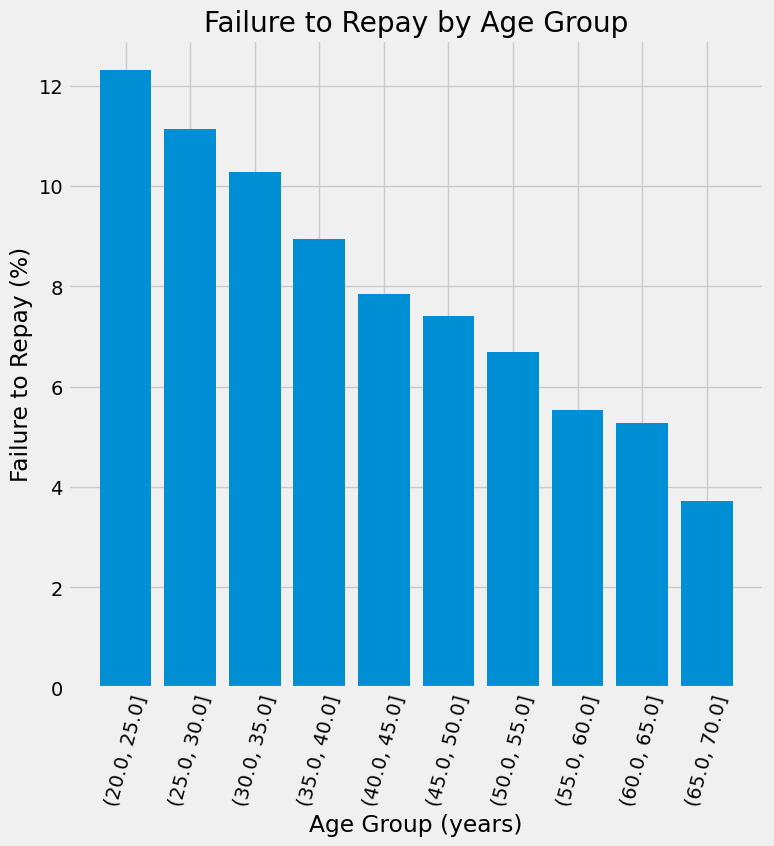

In [50]:
plt.figure(figsize=(8,8))

## Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100*age_groups['TARGET'])

## Plot labeling
plt.xticks(rotation=75)
plt.xlabel('Age Group (years)')
plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

### Exterior Sources
The 3 variables with the strongest negative correlations with the target are EXT_SOURCE_1, EXT_SOURCE_2, and EXT_SOURCE_3. According to the documentation, these features represent a "normalized score from external data source". I'm not sure what this exactly means, but it may be a cumulative sort of credit rating made using numerous sources of data.  
  
Let's take a look at these variables.  
First, we can show the correlations of the EXT_SOURCE features with the target and with each other.  
  
### DeepL 번역
대상과 가장 강한 음의 상관 관계를 가진 3개의 변수는 EXT_SOURCE_1, EXT_SOURCE_2 및 EXT_SOURCE_3입니다. 문서에 따르면 이러한 기능은 "외부 데이터 소스의 정규화된 점수"를 나타냅니다. 이것이 정확히 무엇을 의미하는지 잘 모르겠지만, 다양한 데이터 소스를 사용하여 만든 일종의 누적 신용 등급일 수 있습니다.  
  
이러한 변수를 살펴보겠습니다.  
먼저 EXT_SOURCE 기능의 대상 및 서로 간의 상관 관계를 보여줄 수 있습니다.

In [51]:
## Extract the EXT_SOURCE variables and show correlations
ext_data = app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


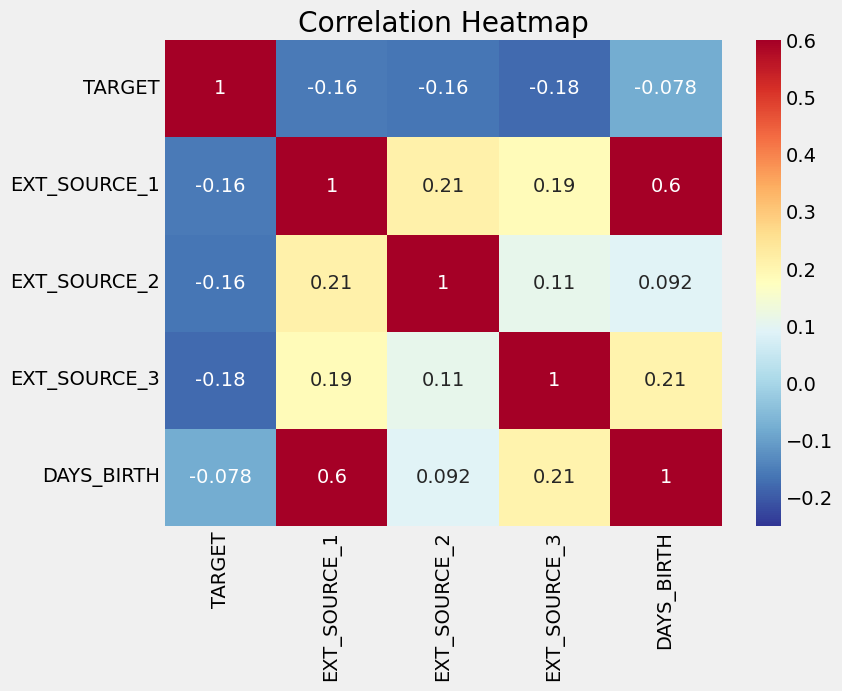

In [55]:
plt.figure(figsize=(8,6))

## Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap=plt.cm.RdYlBu_r, vmin=-0.25, annot=True, vmax=0.6)
plt.title('Correlation Heatmap');